In [1]:
%matplotlib inline

In [100]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# import torch
import csv
import numpy as np
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})

In [9]:
path_to_csv = './nn_linear_varying_widths_batches_results.csv'
data = np.genfromtxt(path_to_csv, delimiter=',', names=True, dtype=None)

In [15]:
data.shape, data

((1728,), array([(   1,    1,    1,   614.07598877, 0.0614076 ),
        (   1,    1,    2,   447.16156006, 0.04471616),
        (   1,    1,    4,   465.6595459 , 0.04656595), ...,
        (2048, 2048,  512,  6532.30175781, 0.65323018),
        (2048, 2048, 1024, 14270.57617188, 1.42705762),
        (2048, 2048, 2048, 23215.14257812, 2.32151426)],
       dtype=[('batch', '<i8'), ('input_dim', '<i8'), ('output_dim', '<i8'), ('total_forward_timems', '<f8'), ('mean_forward_timems', '<f8')]))

In [46]:
unique_batches = np.unique(data['batch'])
unique_batches

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024,
       2048])

In [31]:
unique_input_dims = np.unique(data['input_dim'])
unique_input_dims

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024,
       2048])

In [17]:
data_batch_1 = data[data['batch'] == 1]
data_batch_1.shape

(144,)

In [22]:
data_batch_1_input_dim_1 = data_batch_1[data_batch_1['input_dim'] == 1]
data_batch_1_input_dim_1.shape

(12,)

In [26]:
data_batch_1_input_dim_2 = data_batch_1[data_batch_1['input_dim'] == 1]
data_batch_1_input_dim_2.shape

(12,)

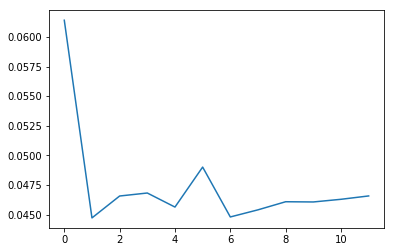

In [30]:
plt.plot(data_batch_1_input_dim_1['mean_forward_timems'], label='data_batch_1_input_dim_1')

Text(0.5, 1.0, 'batch=1 mean_forward_time(ms) vs output_dim')

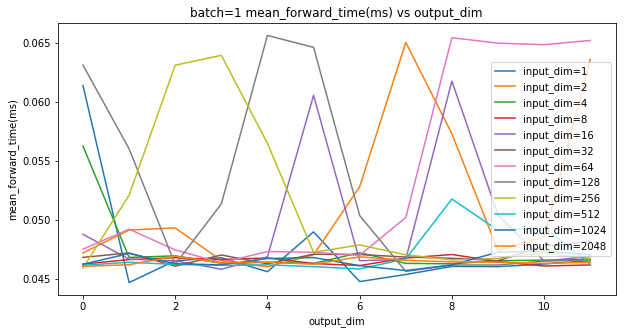

In [41]:
for i in unique_input_dims:
    data_batch_1_input_dim_i = data_batch_1[data_batch_1['input_dim'] == i]
    plt.plot(data_batch_1_input_dim_i['mean_forward_timems'], label='input_dim={}'.format(i))
plt.legend(loc='right')
plt.xlabel('output_dim')
plt.ylabel('mean_forward_time(ms)')
plt.title('batch=1 mean_forward_time(ms) vs output_dim')

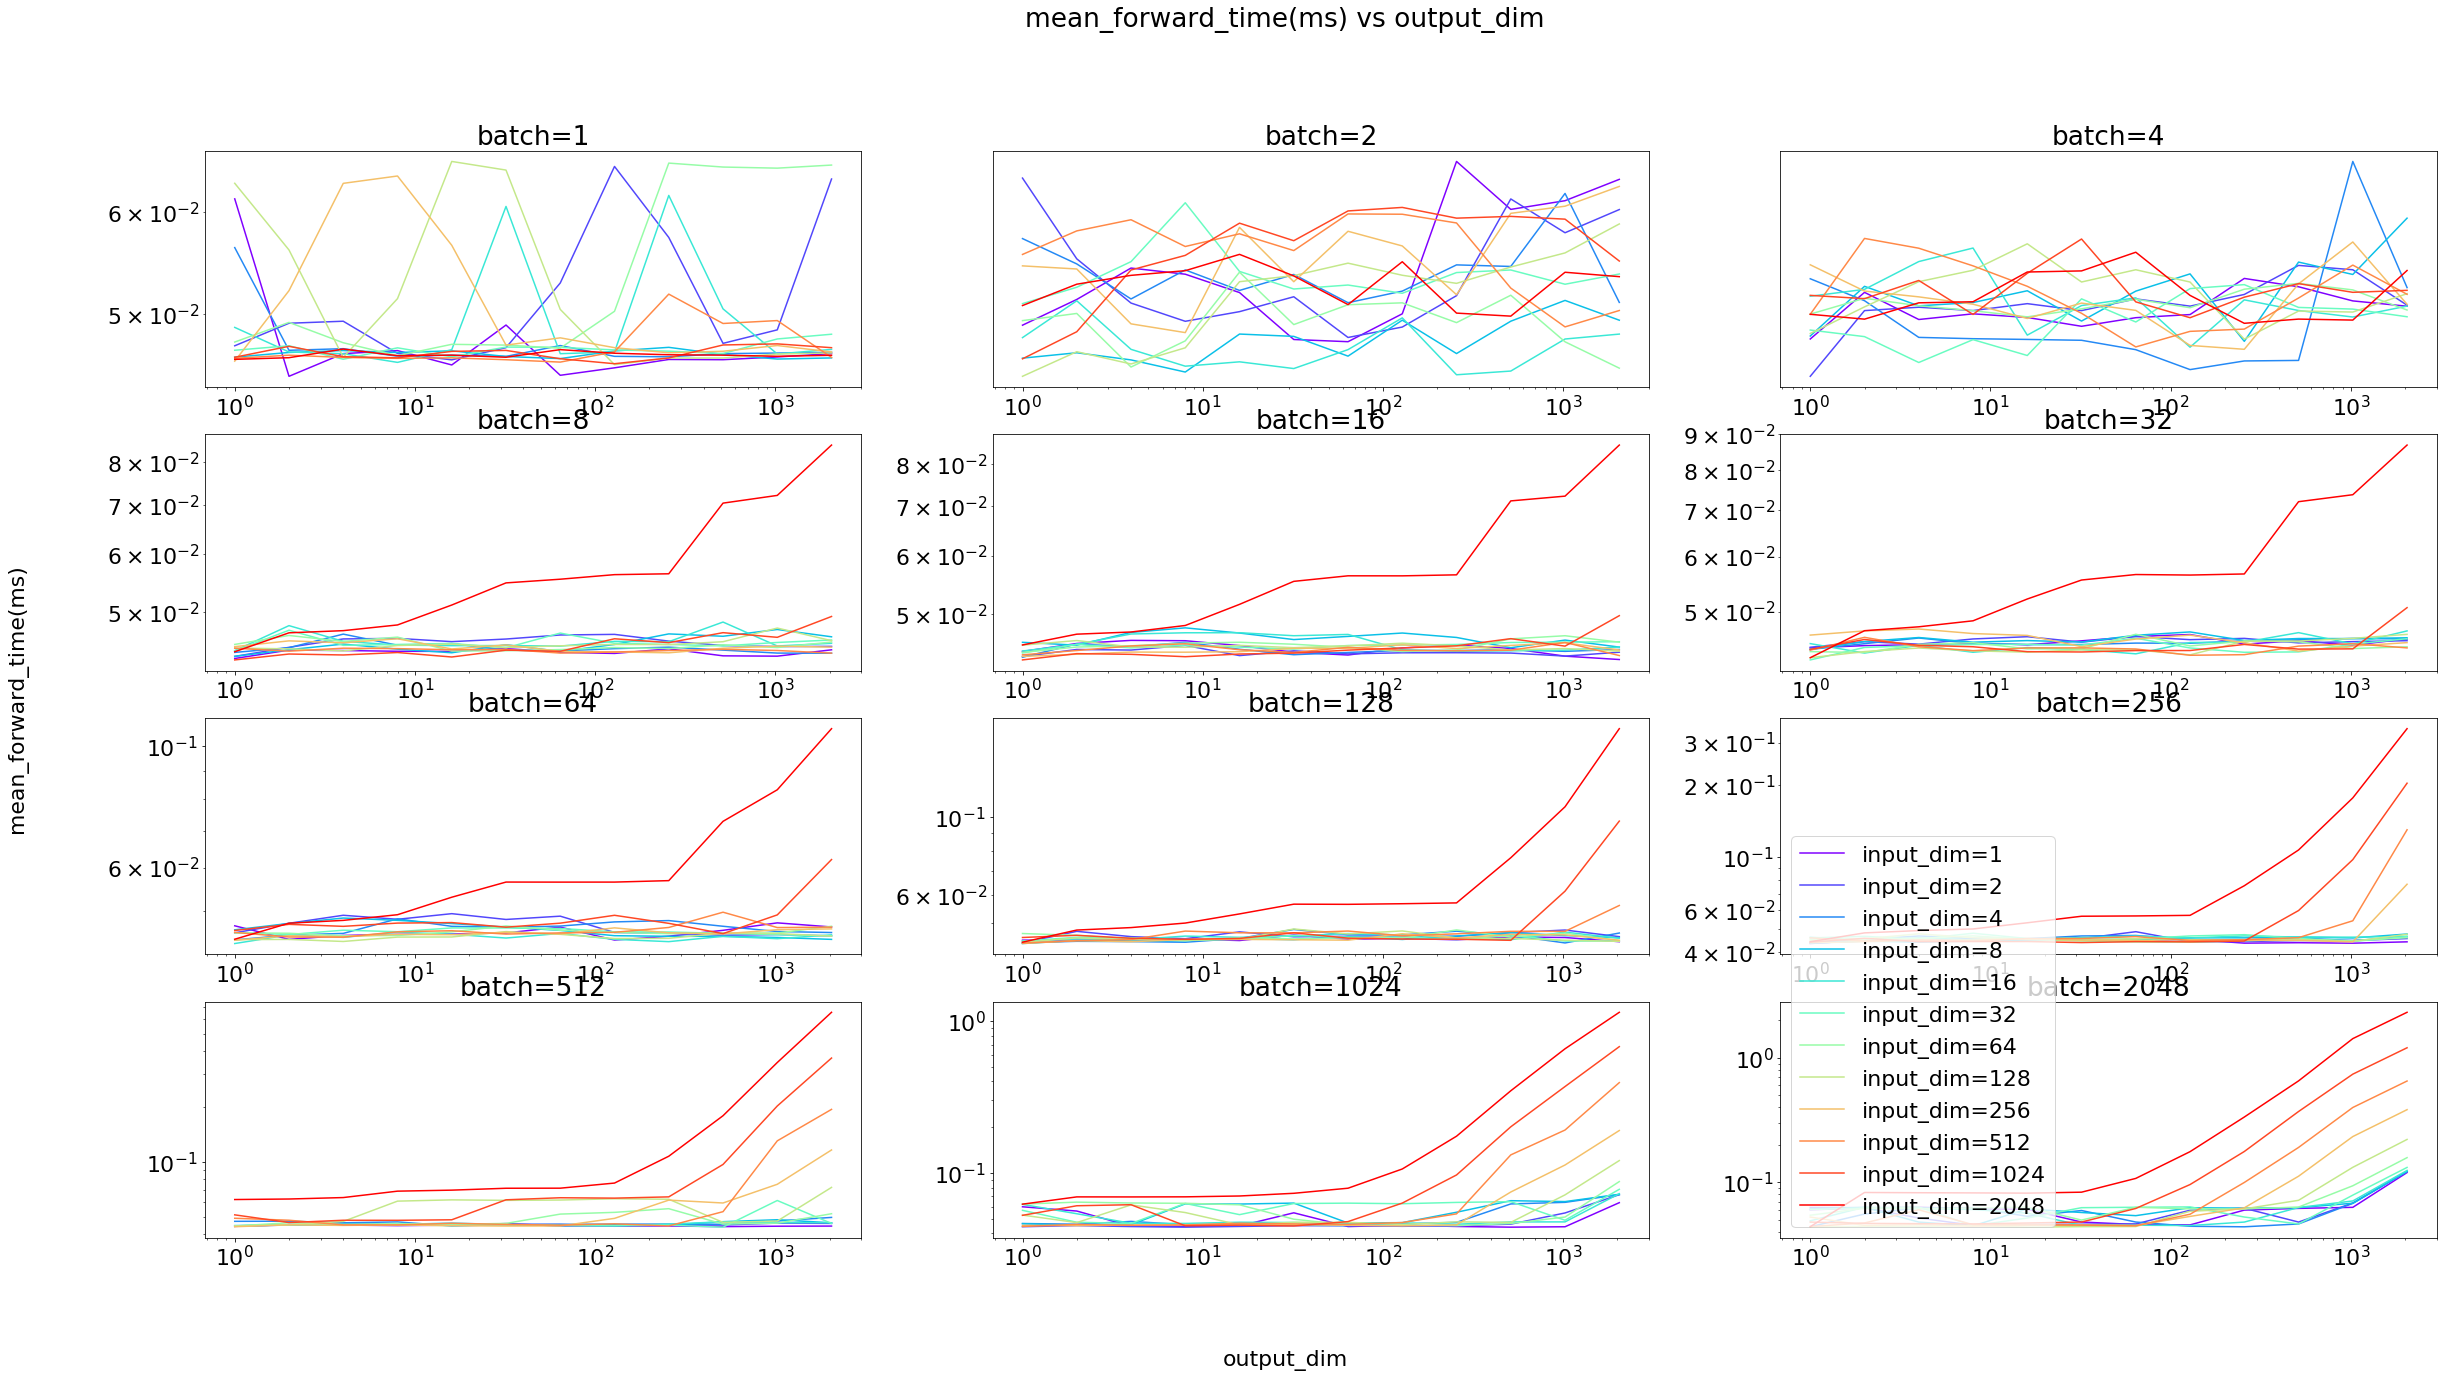

In [110]:
fig, axs = plt.subplots(4, 3)
colors = cm.rainbow(np.linspace(0, 1, len(unique_input_dims)))

for batch_number, batch in enumerate(unique_batches):
    data_batch_j = data[data['batch'] == batch]
    ax = axs.flat[batch_number]
    for number, i in enumerate(unique_input_dims):
        data_batch_j_input_dim_i = data_batch_j[data_batch_j['input_dim'] == i]
        ax.plot([2**i for i in range(12)], data_batch_j_input_dim_i['mean_forward_timems'], label='input_dim={}'.format(i), c=colors[number])
        ax.title.set_text('batch={}'.format(batch))
        ax.set_yscale('log')  # comment this out for normal plot.
        ax.set_xscale('log')  # comment this out for normal plot.

plt.suptitle('mean_forward_time(ms) vs output_dim')
plt.legend(loc='lower left')
fig.text(0.5, 0.04, 'output_dim', ha='center', va='center')
fig.text(0.06, 0.5, 'mean_forward_time(ms)', ha='center', va='center', rotation='vertical')
plt.savefig('bigfig.png')

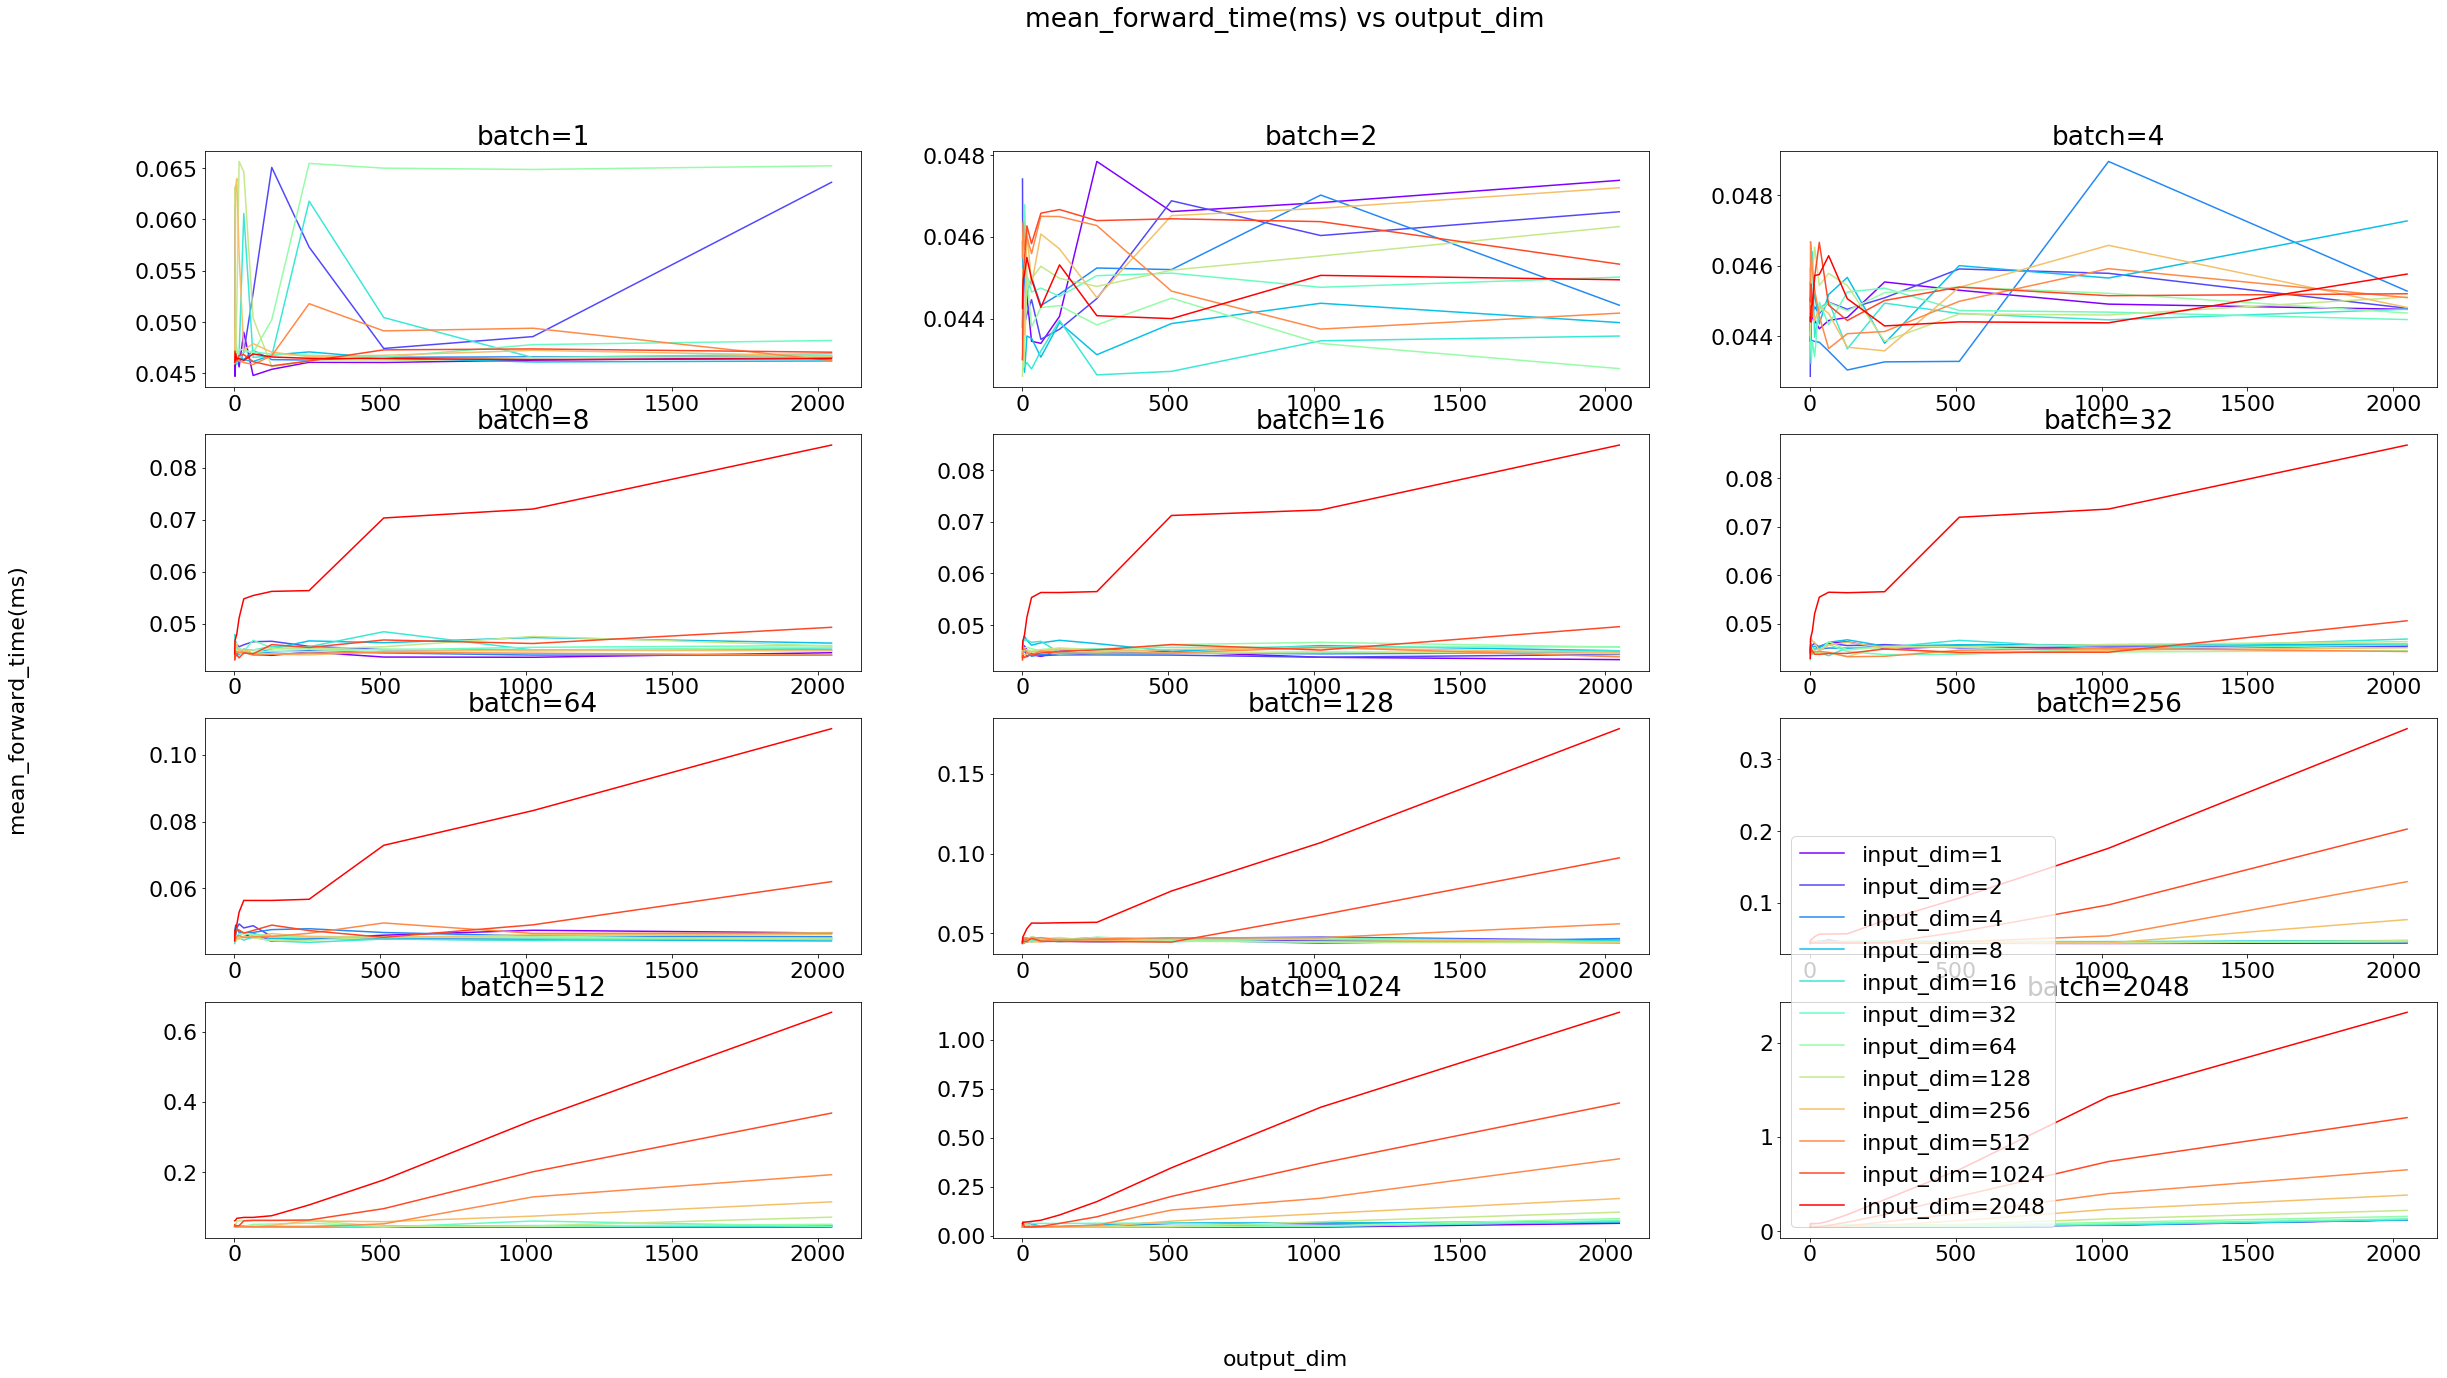

In [109]:
fig, axs = plt.subplots(4, 3)
colors = cm.rainbow(np.linspace(0, 1, len(unique_input_dims)))

for batch_number, batch in enumerate(unique_batches):
    data_batch_j = data[data['batch'] == batch]
    ax = axs.flat[batch_number]
    for number, i in enumerate(unique_input_dims):
        data_batch_j_input_dim_i = data_batch_j[data_batch_j['input_dim'] == i]
        ax.plot([2**i for i in range(12)], data_batch_j_input_dim_i['mean_forward_timems'], label='input_dim={}'.format(i), c=colors[number])
        ax.title.set_text('batch={}'.format(batch))
        # ax.set_yscale('log')  # comment this out for normal plot.
        # ax.set_xscale('log')  # comment this out for normal plot.

plt.suptitle('mean_forward_time(ms) vs output_dim')
plt.legend(loc='lower left')
fig.text(0.5, 0.04, 'output_dim', ha='center', va='center')
fig.text(0.06, 0.5, 'mean_forward_time(ms)', ha='center', va='center', rotation='vertical')
plt.savefig('bigfig.png')